# scikit-learn Notebook 1 of 2- Aaron Donnelly (G00299531)

***

## Overview

#### scikit-learn is a python library that contains many tools that can be used for predictive data analysis and machine learning[1]. scikit-learn was a project started by David Cournapeau during a Google Summer of Code project[2]. sci-kit learn contains many different algorithms that are very user friendly and require very little adjusting to me the used for an individuals specific needs. When it comes in machine learning there are two types of algroithms used. These are 'Supervised' and 'Unsupervised' algorithms. 

### Supervised Learning

#### Supervised alogorithms with regards to machine learning can be described as 'a learning approach thats defined by its use of labeled datasets'. These algorithms use these labelled datasets to 'train' otherwise known as 'supervise' the algorithm into making accurate predictions [3]. The two types of learning associated with supervised are Classification and Regression.

### Unsupervised Learning

#### Unsupervised algorithms are algorithms that do not used labeled datasets. Data that enters an unsupervised algorithm is completely unlabelled.  Due to the fact that the training data provided to an unsupervised model is unlabelled it is impossible to measure the model accuracy. Types on unsupervised algorithms are 'Clustering', 'Association' and 'Dimensionality reduction'[3].

#### In this notebook we will be looking at three different scikit-learn algorithms. These are Classification, Regression and Clustering.

## Classification

#### The first scikit-learn algorithm we will be looking at is 

In [1]:
# Prepare the data. We start by importing pandas to read a dataframe [5]. The data I will be using for this demonstration is the wine dataset contained in sklearn.
import pandas as pd
# Numpy will be imported for later [6]
import numpy as np
import matplotlib.pyplot as plt
# We will import the dataset from the data folder in the repository [7]
df = pd.read_csv("data/winequality-white.csv", sep= ";")
df




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [2]:
# create a variable x for the features matrix.
x= df.drop("quality", axis= 1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [3]:
# create y which is going to be the label for this dataset.
y= df["quality"]
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

#### Now that the data is prepared an appropriate algorithm for the problem must be selected. For this dataset we will be using a classification algorithm.

In [4]:
# The algorithm I chose to use for this was the RandomForestClassifier [8].
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#### Now that we have selected an appropriate classification algorithm, we need to train and test the data from the dataset.

In [5]:
#In order to train and test, the data from the dataset will need to be split into training data and testing data. We do this by
# importing the train_test_split module from sklearn.model_selection.
from sklearn.model_selection import train_test_split

In [6]:
# We now divide the data into test and train data for both the features data and the label data. Setting the testsize to 0.2
# means that 80% of the data will be used to train the algorithm and the remaining data (20%) will be used to test the algorithm after training.
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size= 0.1)

In [7]:
# We now need to fit the training data. Semicolon removes warning message
clf.fit(x_train, y_train);

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [8]:
# Now a prediction can be made on the test data. This code uses the remaning test data to predict what the
# y label should be based on the features.
y_predict = clf.predict(x_test)
y_predict

array([5, 6, 5, 7, 6, 8, 5, 5, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 7, 6, 6, 5, 5, 6, 7, 7, 6, 6, 6, 7, 7, 5, 6, 6, 7,
       5, 8, 6, 5, 5, 6, 7, 6, 6, 7, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6,
       6, 4, 4, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5,
       8, 7, 5, 5, 7, 6, 6, 5, 6, 6, 7, 6, 7, 5, 6, 7, 5, 6, 6, 5, 4, 6,
       5, 7, 6, 6, 6, 6, 7, 5, 6, 7, 6, 5, 6, 7, 5, 6, 6, 8, 5, 5, 5, 5,
       5, 7, 6, 5, 5, 6, 6, 7, 6, 7, 5, 4, 6, 6, 6, 6, 7, 5, 6, 5, 6, 6,
       6, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5,
       5, 5, 7, 7, 4, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 7, 6, 6, 5, 6, 6, 5,
       6, 5, 6, 6, 5, 6, 6, 6, 6, 7, 5, 7, 6, 6, 6, 7, 7, 6, 6, 6, 7, 6,
       7, 6, 6, 6, 5, 7, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 8, 6, 5, 6, 6,
       5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 7, 7, 6, 6, 6, 5,
       7, 8, 4, 5, 6, 6, 6, 6, 5, 5, 6, 6, 7, 6, 6, 6, 5, 6, 6, 5, 8, 6,
       5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 6, 6, 6,

In [9]:
# We can no determine just how good the algorithm is by evaluating the test results.
clf.score(x_train, y_train)

0.9834392014519057

In [10]:
# The below shows that 66% of the time the algorithm could predict the quality of the wine based off the features.
clf.score(x_test, y_test)

0.7020408163265306

In [11]:
estimator = model.estimators_[5]
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file= "tree.dot", feature_names = x.columns, class_names = y.columns, rounded= True, proportion = False, precision = 2, filled = True)

NameError: name 'model' is not defined

## Regression

#### The second type of algorithm from the scikit-learn library we will be looking at is Regression. Regression is also a type of supervised machine learning. The goal of a regression algorithm is to plot a best fit line to data in order to predict the value of the 'dependant variable for individuals for whom some information concerning the explanatory variable is available'[9] . Regression is often used in the business sector in order to carry out accurate forcasting and optimization. There are various types of Regression possible, but the one we will be looking at is Linear Regression.

In [ ]:
#The data set I will be using for the algorithm is a housing dataset from Ames, Iowa [10].
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #[11]
housing = pd.read_csv("data/housing.csv")
housing

In [ ]:
# The next thing I am going to do is search for any missing values in the dataset
housing.isna().sum()

In [ ]:
# I will now check the entire number of rows of the dataset to determine which method would be appropriate to deal with the 
# missing values
len(housing)

In [ ]:
# Seeing as 207 rows only represent 1% of the entire dataset I have decided to drops these rows entirely.
housing.dropna(subset= ["total_bedrooms"], inplace= True)

In [ ]:
# I now run a count on the n/a's again to ensure all were removed.
housing.isna().sum()

In [ ]:
# I now need to convert the ocean_proximity into a datatype that can be used by the machine learning algorithm.
# I will do this using the LabelEncoder from the sklearn.preprocessing library[12].
from sklearn.preprocessing import LabelEncoder


In [ ]:
le = LabelEncoder()
label = le.fit_transform(housing["ocean_proximity"])
label

In [ ]:
# I will now drop the ocean_proximity column in order to replace it with the LabelEncoder column.
x1= housing.drop("ocean_proximity", axis= 1)
# I will now append the new column to the dataset and give it its original name
x1["ocean_proximity"]= label
# I will now rename this dataset x to keep it tidyier.
x= x1



In [ ]:
# We now create the y dataset which in this case will be the SalePrice.
y= housing["median_house_value"]



In [ ]:
# Again just like the classification algorithm the data will be split into test and train groups
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)

In [ ]:
# We now need to fit the training data to the Regression model. The regression model I decided to use here is an 
# EnsembleReregessor algorithm known as RandomForestRegressor[13]
from sklearn.ensemble import RandomForestRegressor


In [ ]:
#We can now train the model using the test data.

model= RandomForestRegressor()
model.fit(x_train,y_train);



In [ ]:
model.score(x_test, y_test)


In [ ]:
model.predict(x_test)

In [ ]:
y_preds = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_preds)

## Clustering

#### The next type of Machine learning algorithm I will be using will be Clustering. Clustering is one of the unsupervised machine learning algorithms and works by creating groups of data called k-clusters. The clustering algorithm I chose to use for this demonstration is the k-means algorithm. Clustering works by dividing groups of similar data-points from a dataset into groups known as clusters. An easy exampl of clustering would be how items are arranged in a supermarket or how people are arranged in a restaurants in cluster of familys or peers. Clustering is a common technique used in industry an example of companys that would use this technique would be Amazon in their recommended for you function or streaming services like Amazon Prime, Netflix, and Disney+. There are three main types of clustering. These are Exclusive Clustering, Overlapping Clustering and Hierarchical Clustering. An example of Hard Clustering is one I will look at below known as K-Means Clustering. This is used when a 'data point/item belongs exclusively to one cluster'[]. An Overlapping Cluster is also known as a Soft Cluster. This type of cluser is when a data point may exists in different cluster and thus leads to overlap among the cluster. A type of Overlapping Cluster is C-Means Clustering. Hierarchical Clustering is when sub clusters can exist in bigger clusters. The smallest of these subcluster are made up of similar data however some of these data point maybe similar to another cluster and thus linking the two clusters. Data points in that cluster may then be similar to data points that second cluster and thus they become linked and so on. See image below to better decribe hierarchical clustering.

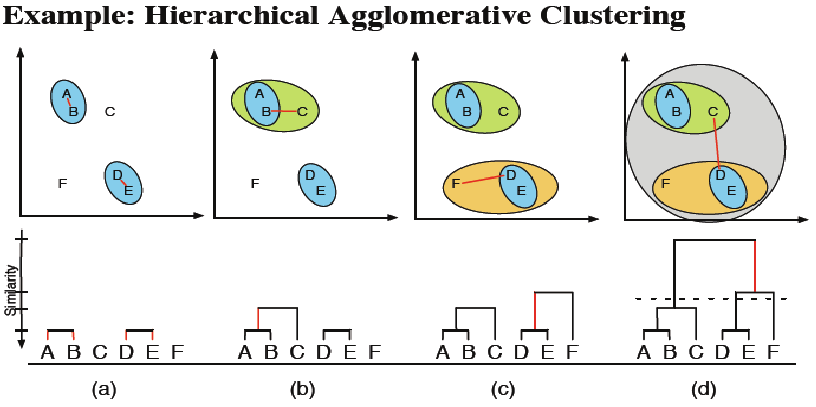
Image taken from https://www.google.ie/url?sa=i&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FExample-of-hierarchical-clustering-clusters-are-consecutively-merged-with-the-most_fig3_273456906&psig=AOvVaw1FTsBknV3oy76LdqSeC7cO&ust=1637870023874000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCPD0mb_jsfQCFQAAAAAdAAAAABAD

### K-Means Clustering

#### The goal of K-Means Clustering is to group datapoints based on their similarities. The 'K' in K-Means Clustering represents the number of groups. The center point of a cluster is known as the centroid. The K-Means algorithm is used widely to solve classification problems.

In [46]:
# I start by importing the libraries i'll be using to demonsrate clustering.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
pd.set_option('display.max_rows', None)


In [47]:
# I'll now load the dataset.
df= pd.read_csv("data/penguins.csv")
df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,11/15/07,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,11/15/07,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Nest never observed with full clutch.
8,PAL0708,9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,Yes,11/09/2007,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,No blood sample obtained.
9,PAL0708,10,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A2,Yes,11/09/2007,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368,No blood sample obtained for sexing.


In [51]:
# I will remove a couple of columns for this example.
p= df[["Culmen Length (mm)","Culmen Depth (mm)","Species","Flipper Length (mm)","Body Mass (g)"]]


In [53]:
p

,Culmen Length (mm),Culmen Depth (mm),Species,Flipper Length (mm),Body Mass (g)
0,39.1,18.7,Adelie Penguin (Pygoscelis adeliae),181.0,3750.0
1,39.5,17.4,Adelie Penguin (Pygoscelis adeliae),186.0,3800.0
2,40.3,18.0,Adelie Penguin (Pygoscelis adeliae),195.0,3250.0
3,NaN,NaN,Adelie Penguin (Pygoscelis adeliae),NaN,NaN
4,36.7,19.3,Adelie Penguin (Pygoscelis adeliae),193.0,3450.0
5,39.3,20.6,Adelie Penguin (Pygoscelis adeliae),190.0,3650.0
6,38.9,17.8,Adelie Penguin (Pygoscelis adeliae),181.0,3625.0
7,39.2,19.6,Adelie Penguin (Pygoscelis adeliae),195.0,4675.0
8,34.1,18.1,Adelie Penguin (Pygoscelis adeliae),193.0,3475.0
9,42.0,20.2,Adelie Penguin (Pygoscelis adeliae),190.0,4250.0


In [56]:
# I will now have a look to see if there are any missing values
p.isna().sum()

Culmen Length (mm)     2
Culmen Depth (mm)      2
Species                0
Flipper Length (mm)    2
Body Mass (g)          2
dtype: int64

In [63]:
# I will drop these values
p= p.dropna()

In [64]:
# Verify
p.isna().sum()

Culmen Length (mm)     0
Culmen Depth (mm)      0
Species                0
Flipper Length (mm)    0
Body Mass (g)          0
dtype: int64

In [66]:
features= p.drop("Species", axis= 1)

In [67]:
features

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
6,38.9,17.8,181.0,3625.0
7,39.2,19.6,195.0,4675.0
8,34.1,18.1,193.0,3475.0
9,42.0,20.2,190.0,4250.0
10,37.8,17.1,186.0,3300.0


In [70]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder

label = le.fit_transform(p["Species"])

TypeError: fit_transform() missing 1 required positional argument: 'y'